In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='ISO-8859-1')

In [32]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [33]:
df.drop(df.columns[2:5], axis=1, inplace=True)
df.columns = ['label', 'text']

In [34]:
df.head(10)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [36]:
df.describe().T

,count,unique,top,freq
label,5572,2,ham,4825
text,5572,5169,"Sorry, I'll call later",30


In [37]:
df.isna().sum()

label    0
text     0
dtype: int64

In [38]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [39]:
# Average word count
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Average word length
df['avg_word_length'] = df['text'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

print("Average Word Count: ", df['word_count'].mean())
print("Average Word Length: ", df['avg_word_length'].mean())

Average Word Count:  15.494436468054559
Average Word Length:  4.28687076403891


In [40]:
# Spam and ham comparison
grouped_stats = df.groupby('label')[['word_count', 'avg_word_length']].mean()
print(grouped_stats)

       word_count  avg_word_length
label                             
ham     14.200622         4.177574
spam    23.851406         4.992839


# Top 20 Most Frequent Words in Spam Messages

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
# Filter only spam messages from the dataset
spam_texts = df[df['label'] == 'spam']['text']

In [43]:
# Initialize CountVectorizer and transform spam texts into a bag-of-words matrix
vectorizer_spam = CountVectorizer()
X_spam = vectorizer_spam.fit_transform(spam_texts)

In [44]:
# Convert the sparse matrix to a dense DataFrame with words as columns
spam_freq_df = pd.DataFrame(X_spam.toarray(), columns=vectorizer_spam.get_feature_names_out())

In [45]:
# Calculate total frequency of each word and select the top 20
top_spam_words = spam_freq_df.sum().sort_values(ascending=False).head(20)

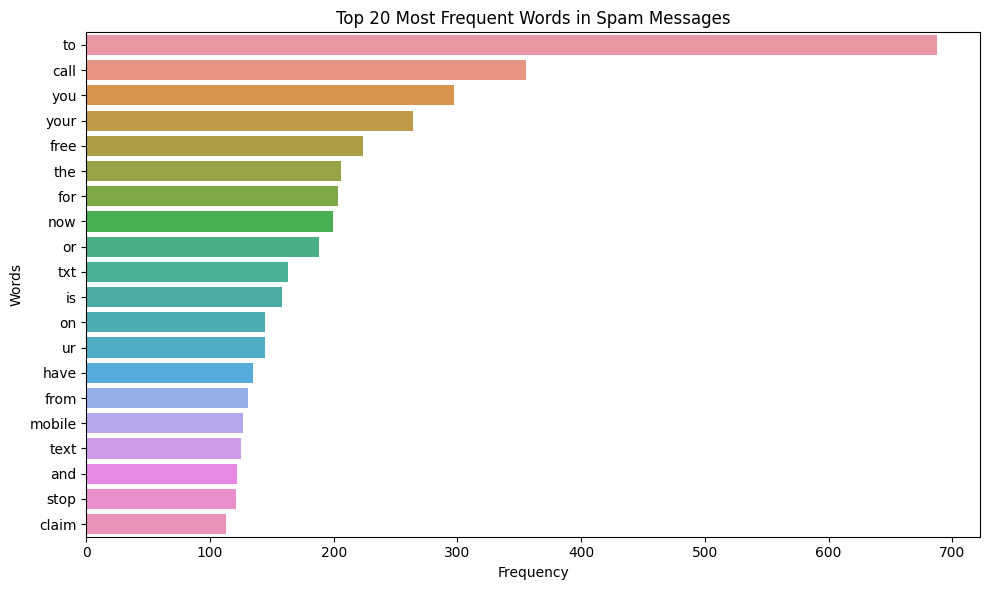

In [46]:
# Plot the top 20 most frequent words using seaborn
plt.figure(figsize=(10,6))
sns.barplot(x=top_spam_words.values, y=top_spam_words.index)
plt.title("Top 20 Most Frequent Words in Spam Messages")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.show()

# Data Cleaning and Preparation

In [47]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [48]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [49]:
# English stopwords list
stop_words = set(stopwords.words('english'))

In [50]:
# Lemmatizer
lemmatizer = WordNetLemmatizer()

In [1]:
def clean_text(text):
    # Lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove emails
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize (split into words)
    words = nltk.word_tokenize(text)
    
    # Remove stopwords and lemmatize
    cleaned = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return ' '.join(cleaned)

In [52]:
# Applying
df['cleaned_text'] = df['text'].apply(clean_text)

# Cleaned text
df[['text', 'cleaned_text']].head(10)

,text,cleaned_text
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though
5,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling week word back id like fun...
6,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent
7,As per your request 'Melle Melle (Oru Minnamin...,per request melle melle oru minnaminunginte nu...
8,WINNER!! As a valued network customer you have...,winner valued network customer selected receiv...
9,Had your mobile 11 months or more? U R entitle...,mobile month u r entitled update latest colour...


In [53]:
# Clear all texts
cleaned_texts = [clean_text(t) for t in df['text']]

In [54]:
df.head(10)

,label,text,word_count,avg_word_length,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",20,4.600000,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,6,4.000000,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,4.571429,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,11,3.545455,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,3.769231,nah dont think go usf life around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,32,3.656250,freemsg hey darling week word back id like fun...
6,ham,Even my brother is not like to speak with me. ...,16,3.875000,even brother like speak treat like aid patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,26,5.192308,per request melle melle oru minnaminunginte nu...
8,spam,WINNER!! As a valued network customer you have...,26,5.115385,winner valued network customer selected receiv...
9,spam,Had your mobile 11 months or more? U R entitle...,29,4.344828,mobile month u r entitled update latest colour...


# Vectorizing Text with TF-IDF

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
vectorizer = TfidfVectorizer(max_features=3000)

X = vectorizer.fit_transform(cleaned_texts)  # Converts text to numeric matrix

# Modelling

## Multinomial Naive Bayes

In [57]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# 'y' etiketler (spam=1, ham=0)
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_nb = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Accuracy: 0.9775784753363229


In [60]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [61]:
print(confusion_matrix(y_test,y_pred_nb))

[[965   0]
 [ 25 125]]


## Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
log_model = LogisticRegression()

log_model.fit(X_train, y_train)

y_pred_lr = log_model.predict(X_test)

In [64]:
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Accuracy: 0.9497757847533632


In [65]:
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Classification Report:
               precision    recall  f1-score   support

         ham       0.95      1.00      0.97       965
        spam       0.96      0.65      0.78       150

    accuracy                           0.95      1115
   macro avg       0.95      0.82      0.87      1115
weighted avg       0.95      0.95      0.95      1115



In [66]:
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


🧩 Confusion Matrix:
 [[961   4]
 [ 52  98]]


## Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [70]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.97847533632287


In [71]:
print(confusion_matrix(y_test, y_pred_rf))

[[965   0]
 [ 24 126]]


In [72]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



## Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

In [75]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.967713004484305


In [76]:
print(confusion_matrix(y_test, y_pred_dt))

[[948  17]
 [ 19 131]]


In [77]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       965
        spam       0.89      0.87      0.88       150

    accuracy                           0.97      1115
   macro avg       0.93      0.93      0.93      1115
weighted avg       0.97      0.97      0.97      1115



## XGBoost 

In [78]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [79]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [80]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train_enc)

y_pred_xgb = xgb_model.predict(X_test)

In [81]:
print("XGBoost Accuracy:", accuracy_score(y_test_enc, y_pred_xgb))

XGBoost Accuracy: 0.9748878923766816


In [82]:
print(confusion_matrix(y_test_enc, y_pred_xgb))

[[961   4]
 [ 24 126]]


In [83]:
print(classification_report(y_test_enc, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.84      0.90       150

    accuracy                           0.97      1115
   macro avg       0.97      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115



# Model Comparison

In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [90]:
models = {
    "Naive Bayes": (y_test, y_pred_nb),
    "Logistic Regression": (y_test, y_pred_lr),
    "Decision Tree": (y_test, y_pred_dt),
    "Random Forest": (y_test, y_pred_rf),
    "XGBoost": (y_test_enc, y_pred_xgb)
}

In [91]:
results = []

for name, (y_true, y_pred) in models.items():
    if y_true.dtype == 'O':
        pos_label = 'spam'
    else:
        pos_label = 1

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, pos_label=pos_label),
        "Recall": recall_score(y_true, y_pred, pos_label=pos_label),
        "F1-Score": f1_score(y_true, y_pred, pos_label=pos_label),
    })

df_results = pd.DataFrame(results)
print(df_results)

                 Model  Accuracy  Precision    Recall  F1-Score
0          Naive Bayes  0.977578   1.000000  0.833333  0.909091
1  Logistic Regression  0.949776   0.960784  0.653333  0.777778
2        Decision Tree  0.967713   0.885135  0.873333  0.879195
3        Random Forest  0.978475   1.000000  0.840000  0.913043
4              XGBoost  0.974888   0.969231  0.840000  0.900000
